In [1]:
from P3_helpers import * 
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
df_ref = get_dataframe()
#remove 2003
df_ref = df_ref[df_ref['Year']!=2003]
df_ref.head(5)

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."


In [73]:
def load_com_csv(file_path):
    #load the file
    df_com = pd.read_csv(file_path)
    #remove the -source in each source name
    df_com['Source'] = df_com['Source'].str.replace('-source', '')
    
    return df_com

In [74]:
years = df_ref['Year'].unique()
df_com = pd.DataFrame(columns = ['Year', 'Community_df'])
for year in years:
    path = 'Community/df_community_'+ str(int(year)) + '.csv'
    df_ = load_com_csv(path)
    df_com.loc[len(df_com)] = [year, df_]
df_com


,Year,Community_df
0,2013.0,Source Community 0 Steel1943...
1,2012.0,Source Community 0 ...
2,2011.0,Source Community 0 ...
3,2010.0,Source Community 0 ...
4,2009.0,Source Community 0 ...
5,2008.0,Source Community 0 Acalamari ...
6,2007.0,Source Community 0 ...
7,2006.0,Source Community 0 ...
8,2004.0,Source Community 0 ...
9,2005.0,Source Community 0 ...


In [ ]:
def plot_size_prop_per_com(df, years):
    # Melt the DataFrame to make it suitable for Seaborn
    df_melt = pd.melt(df[df['Year'].isin(years)], id_vars=['Com_nbr', 'Year'], value_vars=['Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'],
                        var_name='Vote Type', value_name='Pourcentage')

    # Create a facet grid with a separate plot for each year
    g = sns.catplot(x='Com_nbr', y='Pourcentage', hue='Vote Type', col='Year', data=df_melt, kind='bar', palette='colorblind')

    # Add labels and title
    g.set_axis_labels('Community', 'Vote percentage')
    g.fig.suptitle('Vote percentage per community and per year', y=1.02)

    # Move legend to below the graph
    g.fig.subplots_adjust(bottom=0.2)
    sns.move_legend(g, "upper center", bbox_to_anchor=(.5, 0.1), ncol=3, title=None, frameon=False)

    # Show the plot
    plt.show()

In [157]:
def compute_df_size_com (df_com):
    df_com_stat = pd.DataFrame(columns = ['Year'])
    df_com_stat['Year'] = years

    list_nbr_com = df_com['Community_df'].apply(lambda x: x['Community'].max()+1)
    df_com_stat['Nbr_of_com'] = list_nbr_com

    list_nbr_in_com_ = df_com['Community_df'].apply(lambda x: x.groupby('Community').size())
    df_com_stat['Com_size'] = list(list_nbr_in_com_.values)

    #remove nan values when the number of community is lower
    list_nbr_in_com_filtered = df_com_stat['Com_size'].apply(lambda x: x[~np.isnan(x)])
    df_com_stat['Com_size'] = list_nbr_in_com_filtered

    df_com_stat['Source_prop'] = df_com_stat['Com_size'].apply(lambda x: np.round(np.array(x) / np.sum(x), 3))
    return df_com_stat

In [158]:
df_com_stat = compute_df_size_com(df_com)
df_com_stat

,Year,Nbr_of_com,Com_size,Source_prop
0,2013.0,6,"[54.0, 244.0, 111.0, 79.0, 155.0, 152.0]","[0.068, 0.307, 0.14, 0.099, 0.195, 0.191]"
1,2012.0,3,"[301.0, 355.0, 415.0]","[0.281, 0.331, 0.387]"
2,2011.0,5,"[409.0, 77.0, 391.0, 329.0, 58.0]","[0.324, 0.061, 0.309, 0.26, 0.046]"
3,2010.0,4,"[255.0, 595.0, 296.0, 447.0]","[0.16, 0.374, 0.186, 0.281]"
4,2009.0,5,"[17.0, 515.0, 736.0, 434.0, 372.0]","[0.008, 0.248, 0.355, 0.209, 0.179]"
5,2008.0,4,"[960.0, 427.0, 950.0, 365.0]","[0.355, 0.158, 0.352, 0.135]"
6,2007.0,4,"[1255.0, 730.0, 1147.0, 184.0]","[0.378, 0.22, 0.346, 0.055]"
7,2006.0,3,"[1229.0, 1230.0, 789.0]","[0.378, 0.379, 0.243]"
8,2004.0,5,"[188.0, 127.0, 22.0, 278.0, 25.0]","[0.294, 0.198, 0.034, 0.434, 0.039]"
9,2005.0,6,"[685.0, 355.0, 576.0, 15.0, 57.0, 48.0]","[0.395, 0.204, 0.332, 0.009, 0.033, 0.028]"


In [154]:
def compute_df_source_prop_for_plot(df):
    df_expanded = df.apply(lambda row: pd.Series(row['Source_prop']), axis=1)

    # Ajouter la colonne 'Year' à la nouvelle DataFrame
    df_expanded['Year'] = df['Year']

    # Renommer les colonnes pour inclure 'Com_nbr'
    df_expanded.columns = [i if i != 'Year' else i for i in df_expanded.columns]

    # Utiliser melt pour réorganiser la DataFrame
    df_result = pd.melt(df_expanded, id_vars=['Year'], var_name='Com_nbr', value_name='Source_prop')

    # Trier les résultats si nécessaire
    df_result = df_result.sort_values(by=['Year', 'Com_nbr']).reset_index(drop=True)
    df_result = df_result.dropna()
    return df_result

def plot_source_prop(df_result, year):
    # Create a facet grid with a separate plot for each year
    g = sns.catplot(x='Com_nbr', y='Source_prop', hue='Com_nbr', col='Year', data=df_result[df_result['Year'].isin(year)], kind='bar', palette='colorblind')

    # Add labels and title
    g.set_axis_labels('Community', 'Size proportion')
    g.fig.suptitle('Size proportion per community and per year', y=1.02)

    # Move legend to below the graph
    g.fig.subplots_adjust(bottom=0.2)
    sns.move_legend(g, "upper center", bbox_to_anchor=(.5, 0.1), ncol=6, title=None, frameon=False)

    # Show the plot
    plt.show()

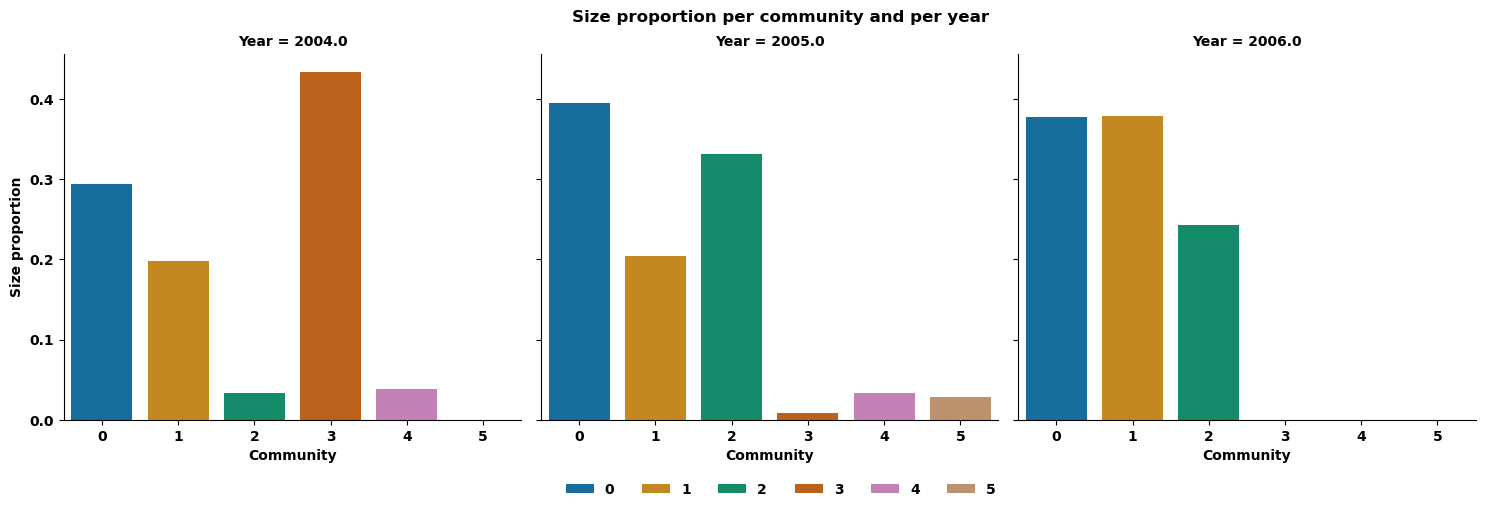

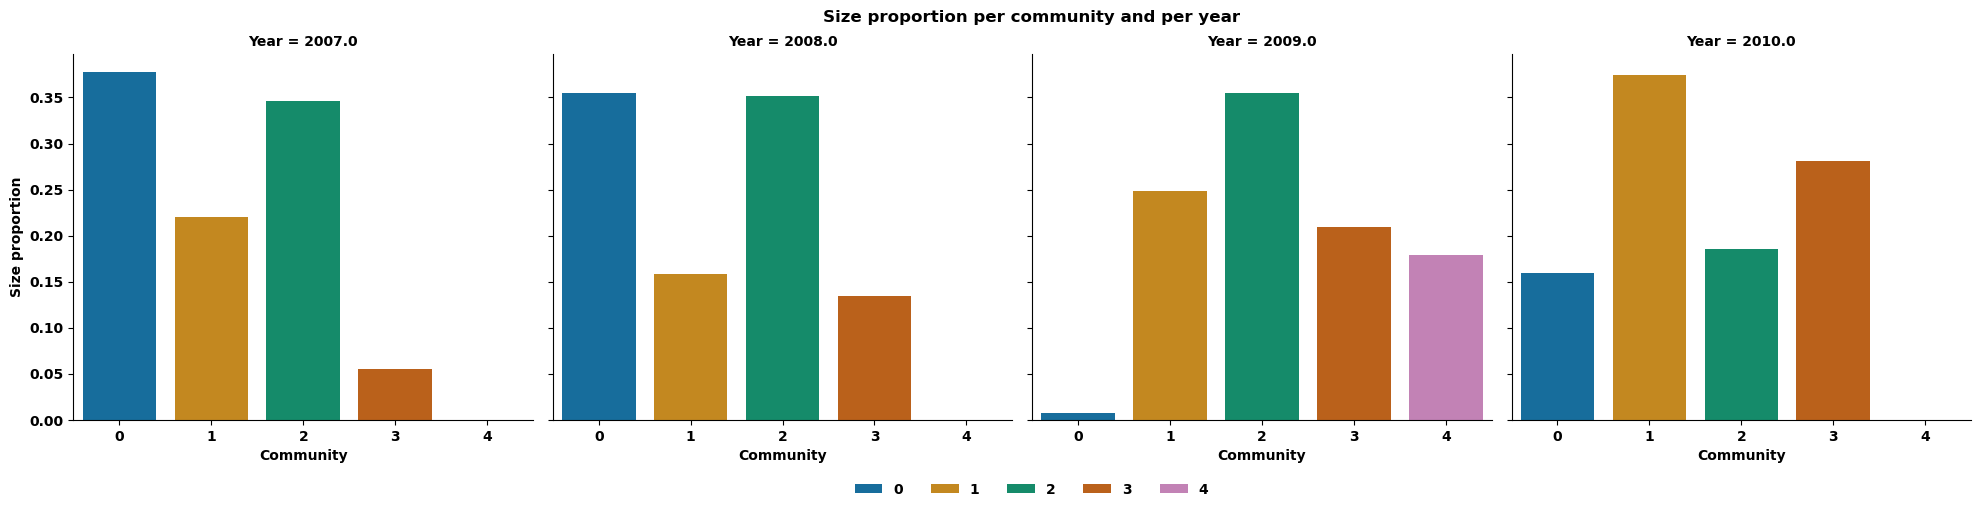

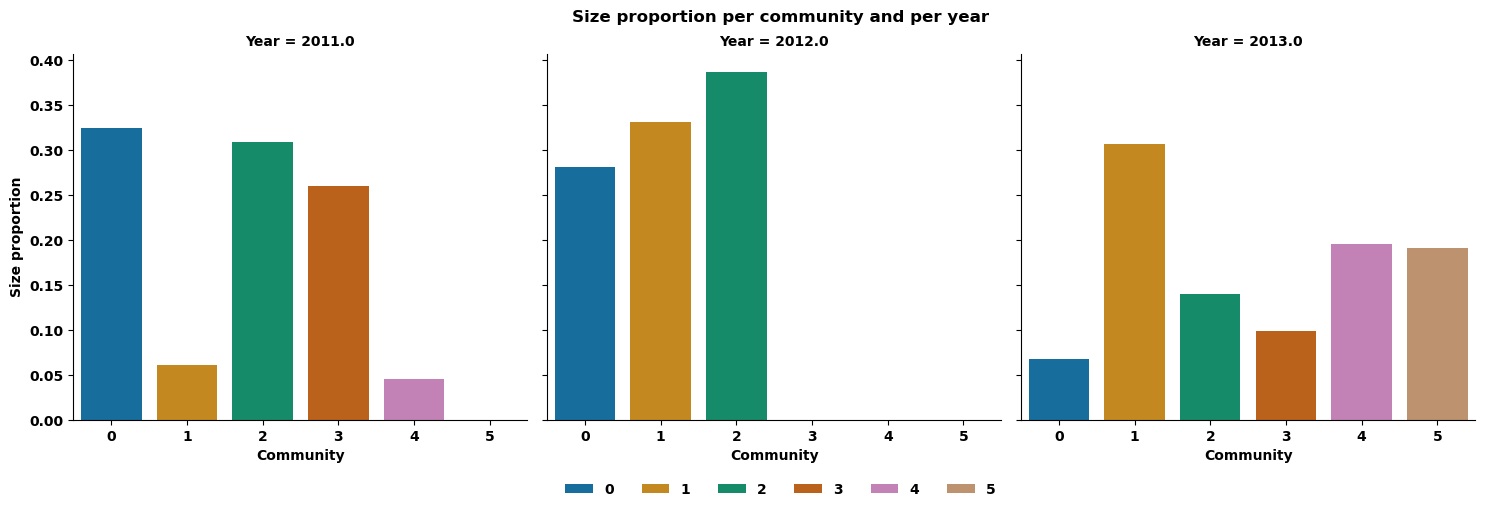

In [155]:
df_prop_plot = compute_df_source_prop_for_plot(df_com_stat)
plot_source_prop(df_prop_plot, [2004,2005,2006])
plot_source_prop(df_prop_plot, [2007,2008,2009,2010])
plot_source_prop(df_prop_plot, [2011,2012,2013])

## Type of vote

In [76]:
years = df_ref['Year'].unique()
dict_com = {}
for year in years:
    path = 'Community/df_community_'+ str(int(year)) + '.csv'
    df_ = load_com_csv(path)
    dict_com[str(int(year))]=df_



In [77]:
def com_vote(df_ref, df_com_year_, year):
    #filter the ref df
    df_ref_year = df_ref[df_ref['Year']==int(year)]
    #extract the source for the community df for 1 year
    source_per_com = df_com_year_.groupby('Community').apply(lambda x : x['Source'])
    pos_vote_prop = []
    neg_vote_prop = []
    neu_vote_prop = []
    #loop over all communities of this year
    for n in range (df_com_year_['Community'].max()+1):
        com = list(source_per_com[n].values)
        #extract rows of the ref df based on the source which are in the community n
        df_com = df_ref_year[df_ref_year['Source'].isin(com)].reset_index(drop=True)
        #extract proportion for theses sources
        prop_vote_pos_com = np.sum(df_com['Vote']==1)/len(df_com['Vote'])
        prop_vote_neg_com = np.sum(df_com['Vote']==-1)/len(df_com['Vote'])
        prop_vote_neu_com = np.sum(df_com['Vote']==0)/len(df_com['Vote'])
        pos_vote_prop.append(prop_vote_pos_com)
        neg_vote_prop.append(prop_vote_neg_com)
        neu_vote_prop.append(prop_vote_neu_com)
    #create the df
    years_ = [int(year)]*(df_com_year_['Community'].max()+1)
    com = list(range(df_com_year_['Community'].max()+1))
    df_stat_com = pd.DataFrame(columns=['Year', 'Com_nbr', 'Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'])
    df_stat_com['Year'] = years_
    df_stat_com['Com_nbr'] = com
    df_stat_com['Pos_vote_prop'] = pos_vote_prop
    df_stat_com['Neg_vote_prop'] = neg_vote_prop
    df_stat_com['Neu_vote_prop'] = neu_vote_prop
    
    return df_stat_com

In [78]:
df_stat_com = pd.DataFrame(columns=['Year', 'Com_nbr', 'Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'])
for year in dict_com.keys():
    df_com_year = dict_com[str(year)]
    stat_com = com_vote(df_ref, df_com_year, year)
    df_stat_com = pd.concat([df_stat_com, stat_com], ignore_index=True)
df_stat_com.head(5)

,Year,Com_nbr,Pos_vote_prop,Neg_vote_prop,Neu_vote_prop
0,2013,0,0.451220,0.463415,0.085366
1,2013,1,0.802198,0.133929,0.063874
2,2013,2,0.706037,0.233596,0.060367
3,2013,3,0.728448,0.211207,0.060345
4,2013,4,0.718789,0.225725,0.055485


In [79]:
def plot_dist_vote_per_com(df, years):
    # Melt the DataFrame to make it suitable for Seaborn
    df_melt = pd.melt(df[df['Year'].isin(years)], id_vars=['Com_nbr', 'Year'], value_vars=['Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'],
                        var_name='Vote Type', value_name='Pourcentage')

    # Create a facet grid with a separate plot for each year
    g = sns.catplot(x='Com_nbr', y='Pourcentage', hue='Vote Type', col='Year', data=df_melt, kind='bar', palette='colorblind')

    # Add labels and title
    g.set_axis_labels('Community', 'Vote percentage')
    g.fig.suptitle('Vote percentage per community and per year', y=1.02)

    # Move legend to below the graph
    g.fig.subplots_adjust(bottom=0.2)
    sns.move_legend(g, "upper center", bbox_to_anchor=(.5, 0.1), ncol=3, title=None, frameon=False)

    # Show the plot
    plt.show()

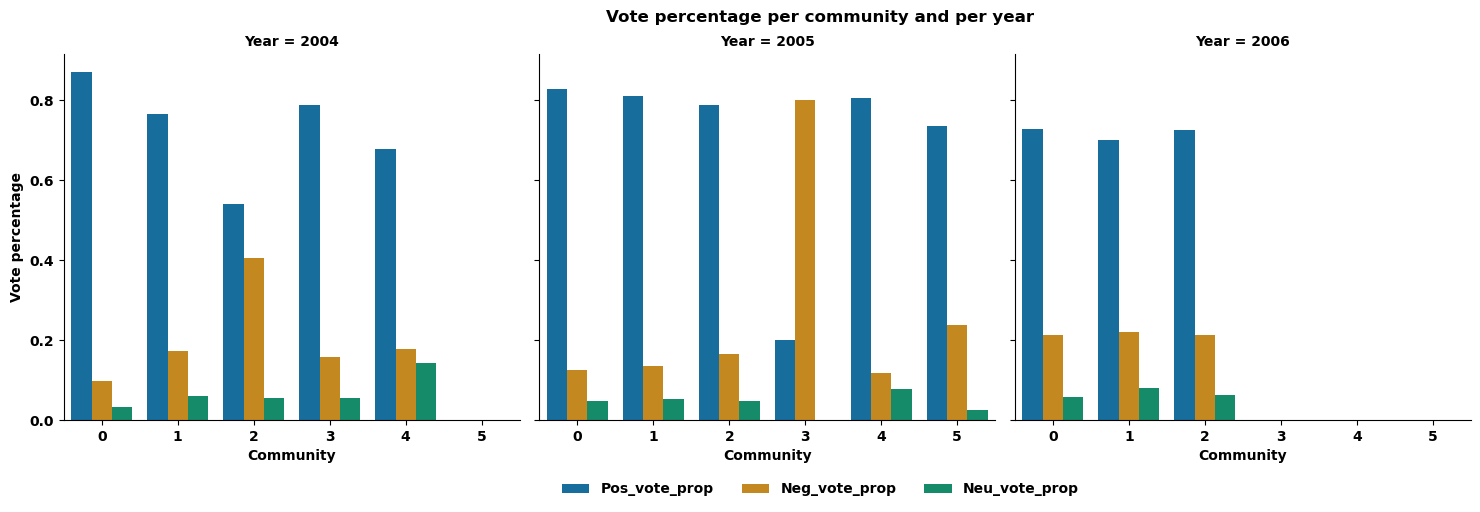

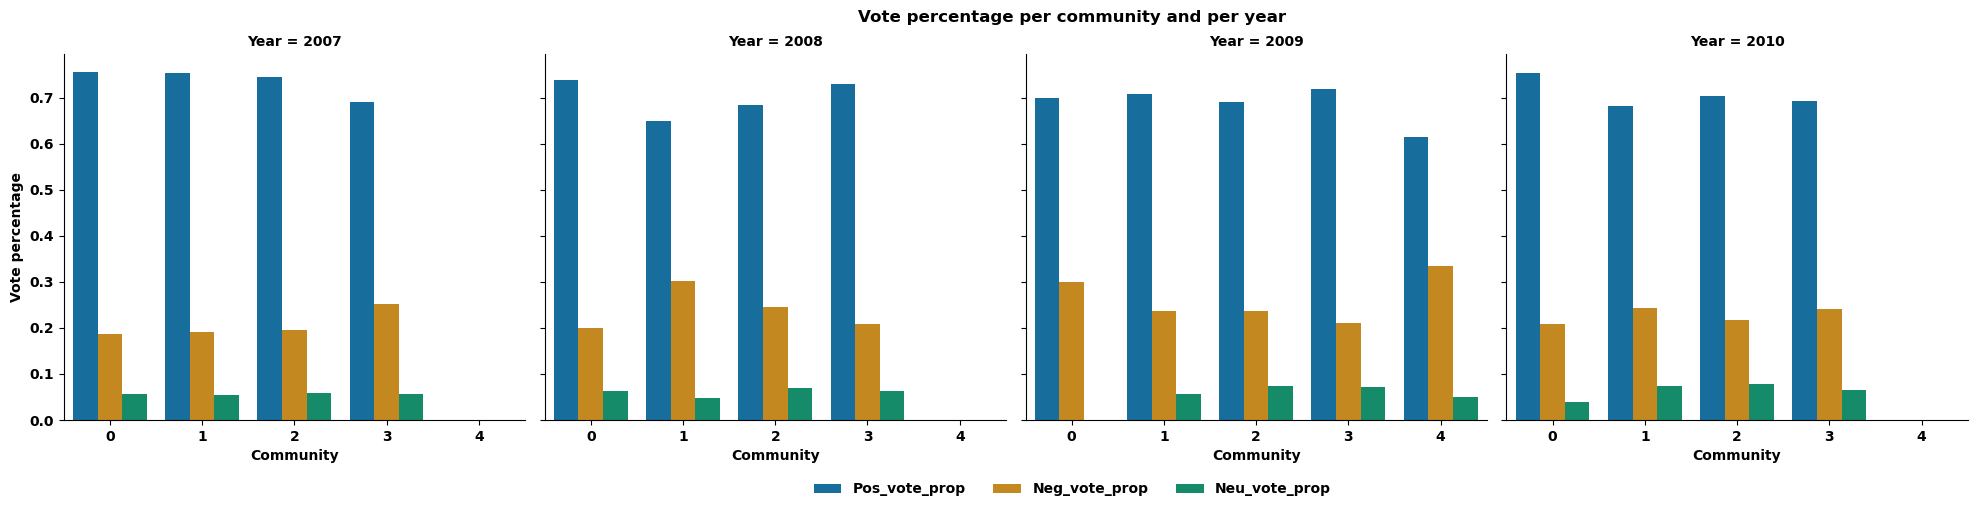

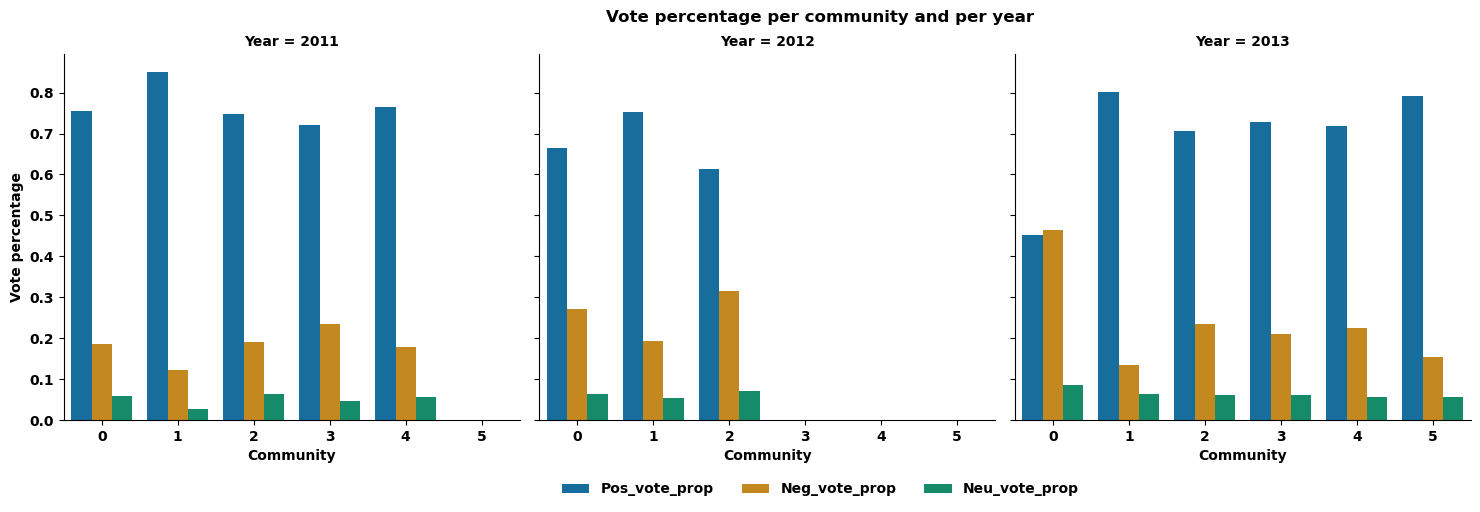

In [80]:
plot_dist_vote_per_com(df_stat_com, [2004,2005,2006])
plot_dist_vote_per_com(df_stat_com, [2007,2008,2009,2010])
plot_dist_vote_per_com(df_stat_com, [2011,2012,2013])

In [106]:
def plot_vote_type_on_whole_year(df):
    # Melt the DataFrame to have 'mean' and 'median' in the same column
    melted_df = pd.melt(df, id_vars=['Year'], var_name='Statistic', value_name='Value')

    # Create a bar plot using Seaborn
    plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
    sns.barplot(x='Year', y='Value', hue='Statistic', data=melted_df, palette='muted')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Vote Type proportion')
    plt.title('Vote type per year')

    # Add legend
    plt.legend(title='Vote', loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

    # Show the plot
    plt.show()


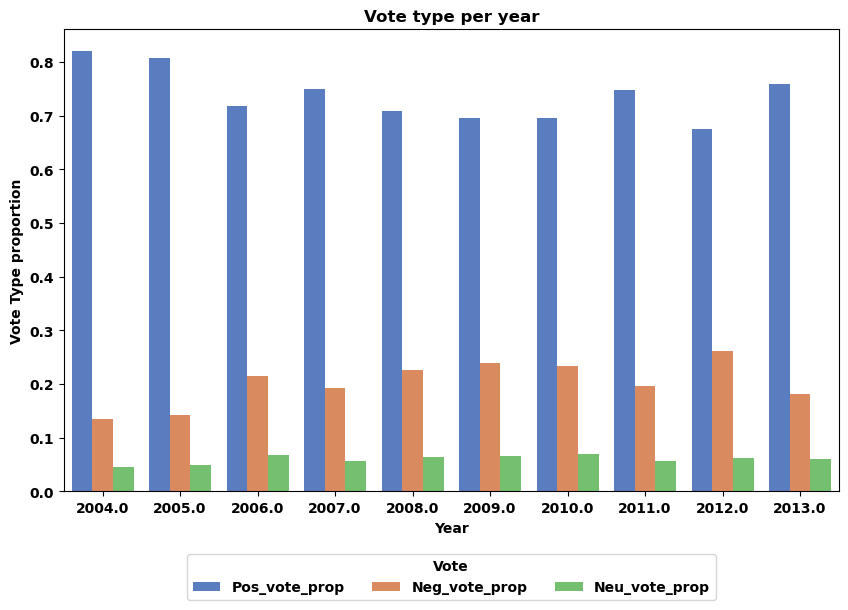

In [107]:
prop_vote_per_year = df_ref.groupby('Year')['Vote'].value_counts(normalize=True).unstack(fill_value=0)

# Extract proportions for each type of vote
prop_vote_pos = prop_vote_per_year[1]
prop_vote_neg = prop_vote_per_year[-1]
prop_vote_neu = prop_vote_per_year[0]

df_prop_vote_per_year = pd.DataFrame(columns=['Year', 'Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'])
df_prop_vote_per_year['Year'] = list(prop_vote_per_year.index)
df_prop_vote_per_year['Pos_vote_prop'] = prop_vote_pos.values
df_prop_vote_per_year['Neg_vote_prop'] = prop_vote_neg.values
df_prop_vote_per_year['Neu_vote_prop'] = prop_vote_neu.values
df_prop_vote_per_year

plot_vote_type_on_whole_year(df_prop_vote_per_year)

## Voting time

In [65]:
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.head(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0.000000,1
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--,1,1.850000,6
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.,1,0.500000,2
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,0.966667,3
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,1.716667,4


In [13]:
def com_vote(df_ref, df_com_year_, year):
    #filter the ref df
    df_ref_year = df_ref[df_ref['Year']==int(year)]
    #extract the source for the community df for 1 year
    source_per_com = df_com_year_.groupby('Community').apply(lambda x : x['Source'])
    
    
    mean_voting_time = []
    median_voting_time = []
    #loop over all communities of this year
    for n in range (df_com_year_['Community'].max()+1):
        com = list(source_per_com[n].values)
        #extract rows of the ref df based on the source which are in the community n
        df_com = df_ref_year[df_ref_year['Source'].isin(com)].reset_index(drop=True)
        
        #extract proportion for theses sources
        mean_ = df_com['Voting_time'].mean()
        mean_voting_time.append(mean_)

        median_ = df_com['Voting_time'].median()
        median_voting_time.append(median_)
    #create the df
    years_ = [int(year)]*(df_com_year_['Community'].max()+1)
    com = list(range(df_com_year_['Community'].max()+1))
    df_stat_com = pd.DataFrame(columns=['Year', 'Com_nbr', 'Mean_voting_time', 'Median_voting_time'])
    df_stat_com['Year'] = years_
    df_stat_com['Com_nbr'] = com
    df_stat_com['Mean_voting_time'] = mean_voting_time
    df_stat_com['Median_voting_time'] = median_voting_time
    
    return df_stat_com

In [17]:
df_stat_com_voting_time = pd.DataFrame(columns=['Year', 'Com_nbr', 'Mean_voting_time', 'Median_voting_time'])
for year in dict_com.keys():
    if int(year)==2003: continue
    df_com_year = dict_com[str(year)]
    stat_com = com_vote(df_vote_evolution, df_com_year, year)
    df_stat_com_voting_time = pd.concat([df_stat_com_voting_time, stat_com], ignore_index=True)
df_stat_com_voting_time.head(5)

,Year,Com_nbr,Mean_voting_time,Median_voting_time
0,2013,0,48.539254,31.241667
1,2013,1,53.435567,36.683333
2,2013,2,56.030526,43.691667
3,2013,3,65.485065,52.133333
4,2013,4,54.901408,35.833333


In [35]:
def plot_voting_time_per_com(df, years):
    # Melt the DataFrame to make it suitable for Seaborn
    df_melt = pd.melt(df[df['Year'].isin(years)], id_vars=['Com_nbr', 'Year'], value_vars=['Mean_voting_time', 'Median_voting_time'],
                        var_name='Vote Type', value_name='Pourcentage')

    # Create a facet grid with a separate plot for each year
    g = sns.catplot(x='Com_nbr', y='Pourcentage', hue='Vote Type', col='Year', data=df_melt, kind='bar', palette='colorblind')

    # Add labels and title
    g.set_axis_labels('Community', 'Voting Time')
    g.fig.suptitle('Voting time per community and per year', y=1.02)

    # Move legend to below the graph
    g.fig.subplots_adjust(bottom=0.2)
    sns.move_legend(g, "upper center", bbox_to_anchor=(.5, 0.1), ncol=3, title=None, frameon=False)

    # Show the plot
    plt.show()

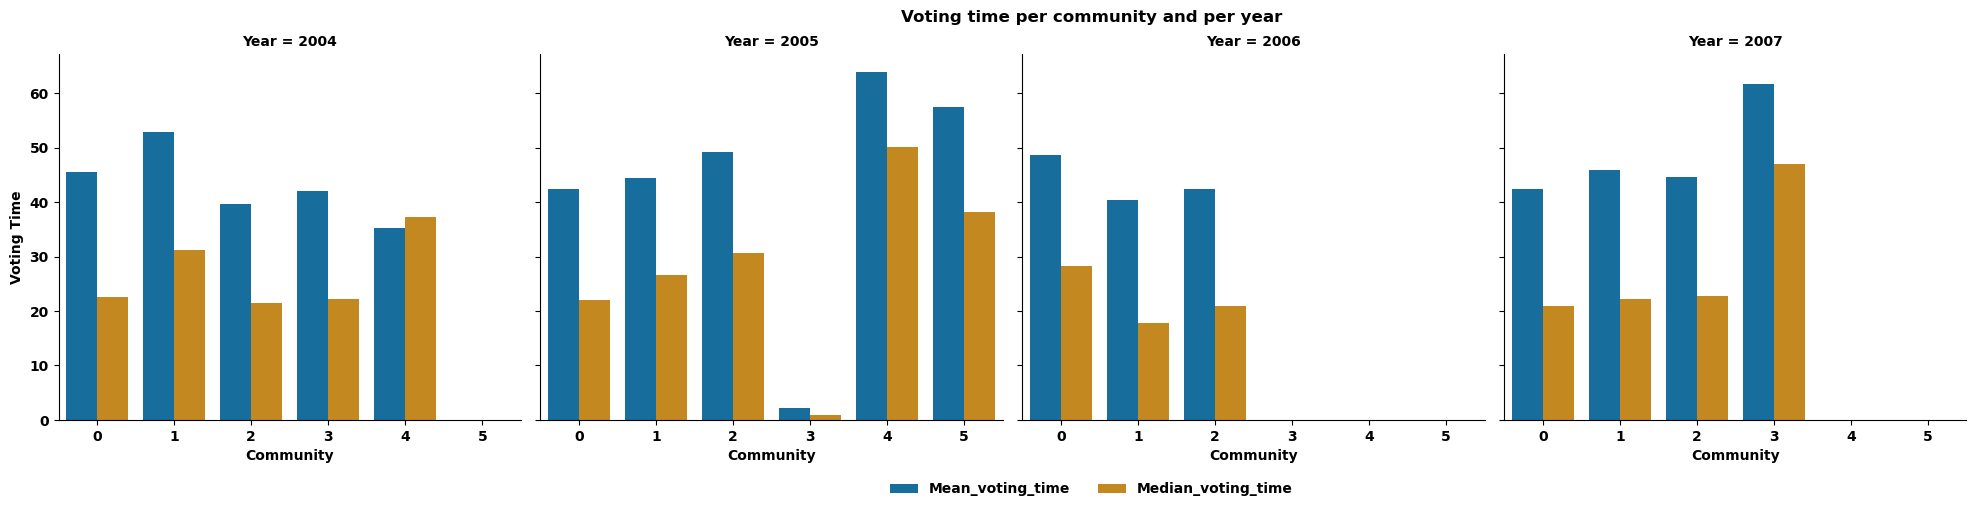

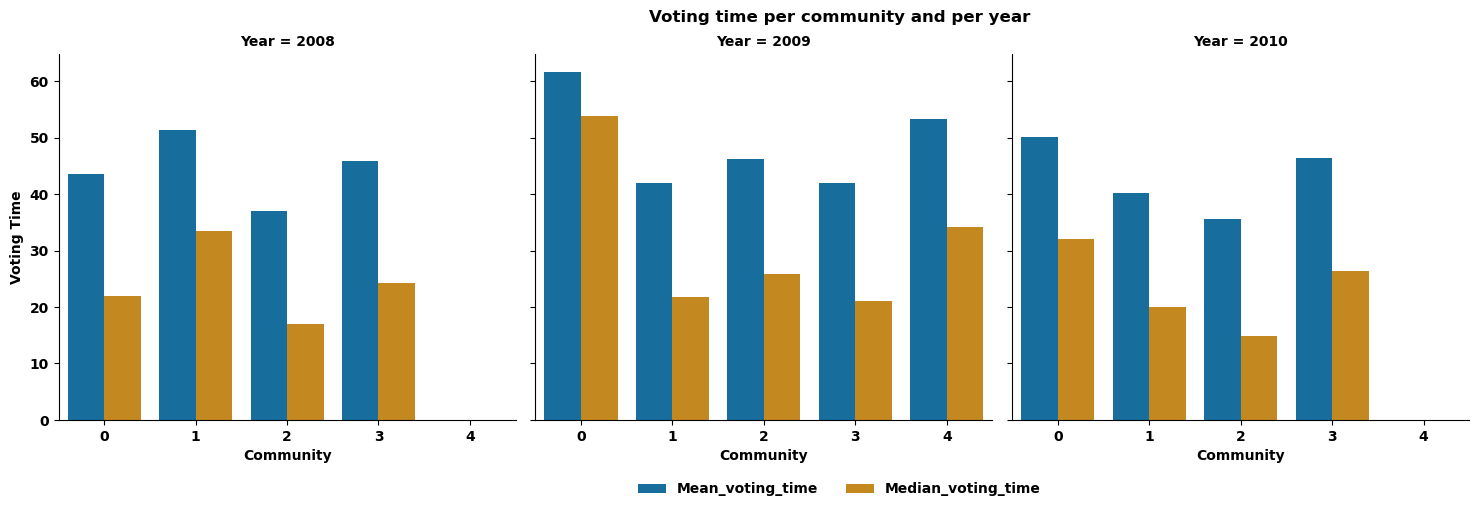

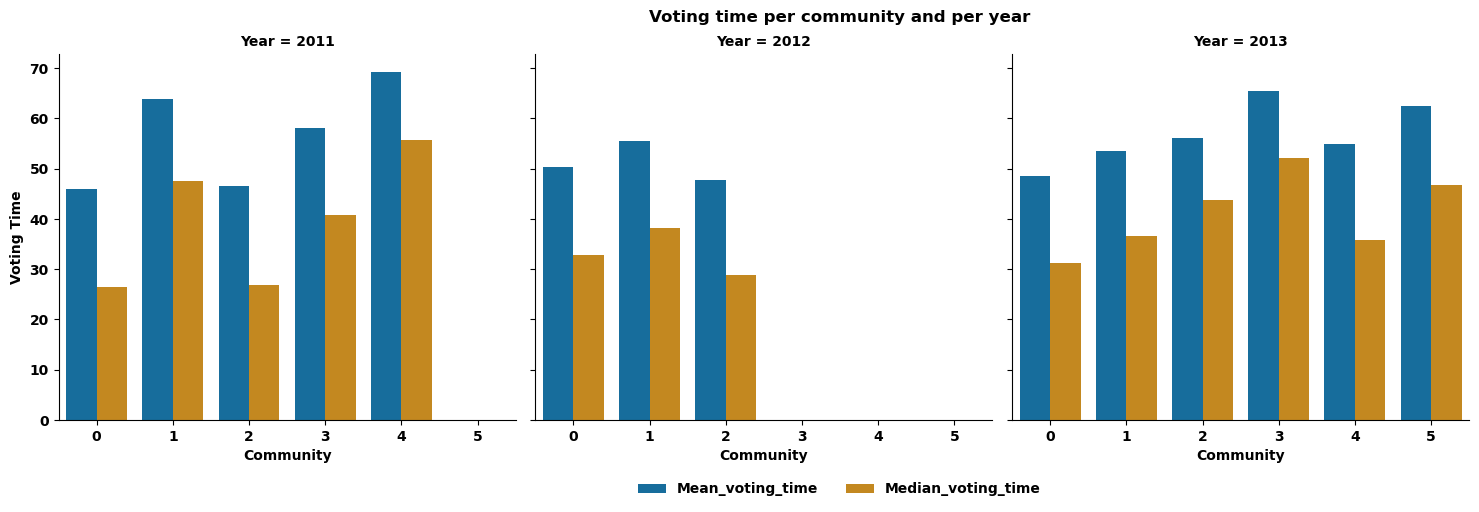

In [36]:
plot_voting_time_per_com(df_stat_com_voting_time, [2004, 2005, 2006, 2007])
plot_voting_time_per_com(df_stat_com_voting_time, [2008, 2009, 2010])
plot_voting_time_per_com(df_stat_com_voting_time, [2011, 2012, 2013])

In [62]:
def plot_voting_time_on_whole_year(df):
    # Melt the DataFrame to have 'mean' and 'median' in the same column
    melted_df = pd.melt(df, id_vars=['Year'], var_name='Statistic', value_name='Value')

    # Create a bar plot using Seaborn
    plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
    sns.barplot(x='Year', y='Value', hue='Statistic', data=melted_df, palette='muted')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Voting Time')
    plt.title('Mean and Median Voting Time per Year')

    # Add legend
    plt.legend(title='Statistic')

    # Show the plot
    plt.show()


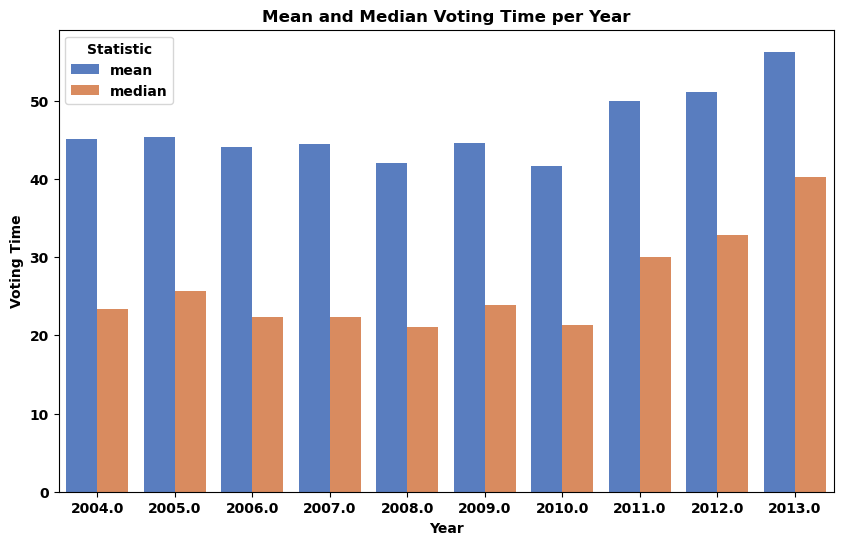

In [64]:
mean_median_voting_time_per_year = df_vote_evolution.groupby('Year')['Voting_time'].agg(('mean', 'median'))
mean_median_voting_time_per_year['Year']= list(mean_median_voting_time_per_year.index)
mean_median_voting_time_per_year=mean_median_voting_time_per_year[['mean', 'median', 'Year']]
plot_voting_time_on_whole_year(mean_median_voting_time_per_year)

On peut comparer le temps median/moyen de vote pour chaque année et regarder si chaque communauté vote plus ou moins vite par rapport à cette base line

## Influence inside communities